<a href="https://colab.research.google.com/github/rudie999/PCVK/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

1. Membuat file project baru  

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)


<BarContainer object of 256 artists>

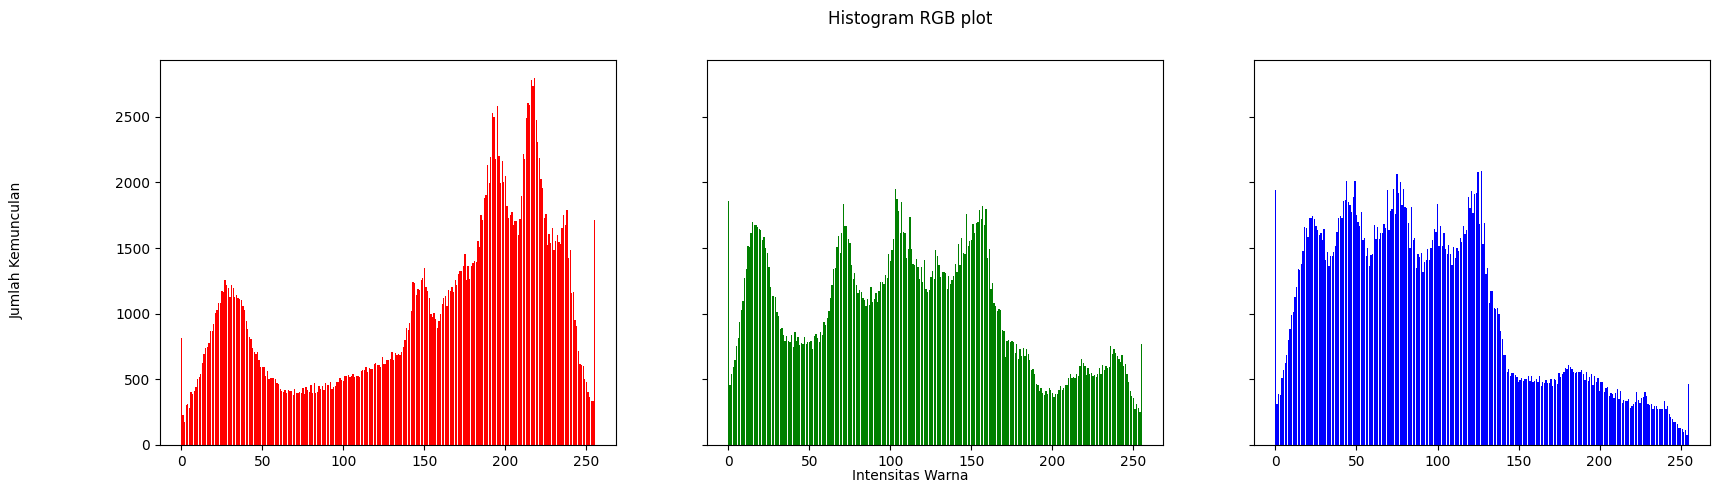

In [27]:
img = cv.imread('/content/sample_data/Lenna.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?


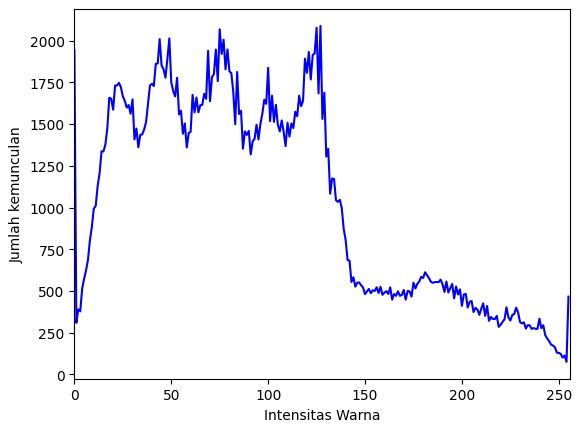

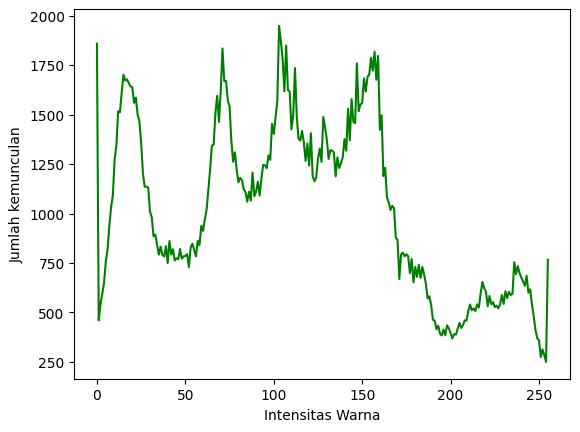

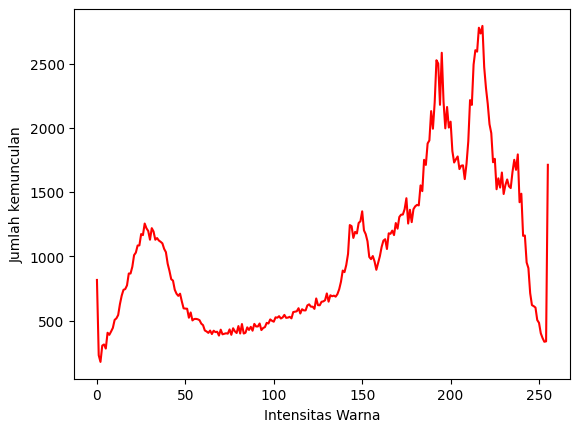

In [28]:
colors = ("b","g","r")
channel_ids = (0, 1, 2)

#Membuat Histogram Plot
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

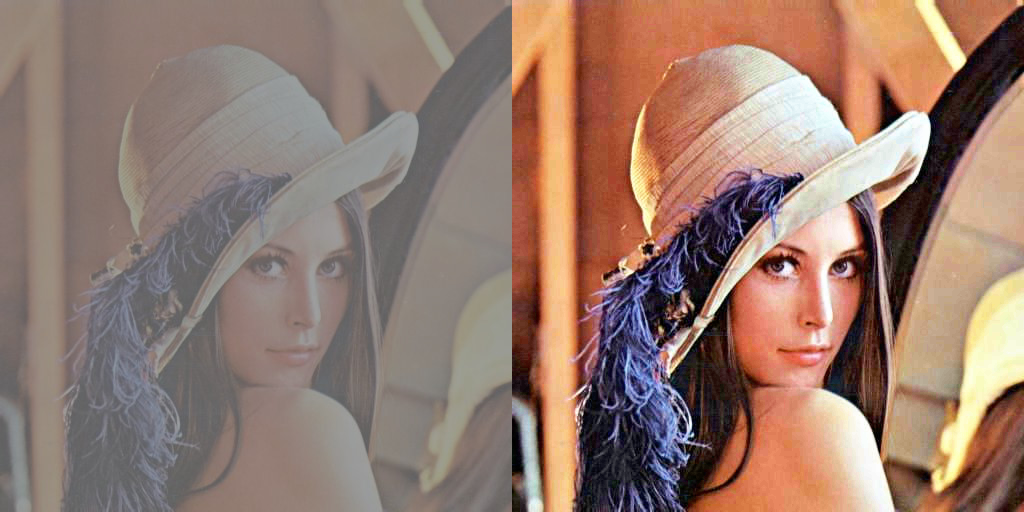

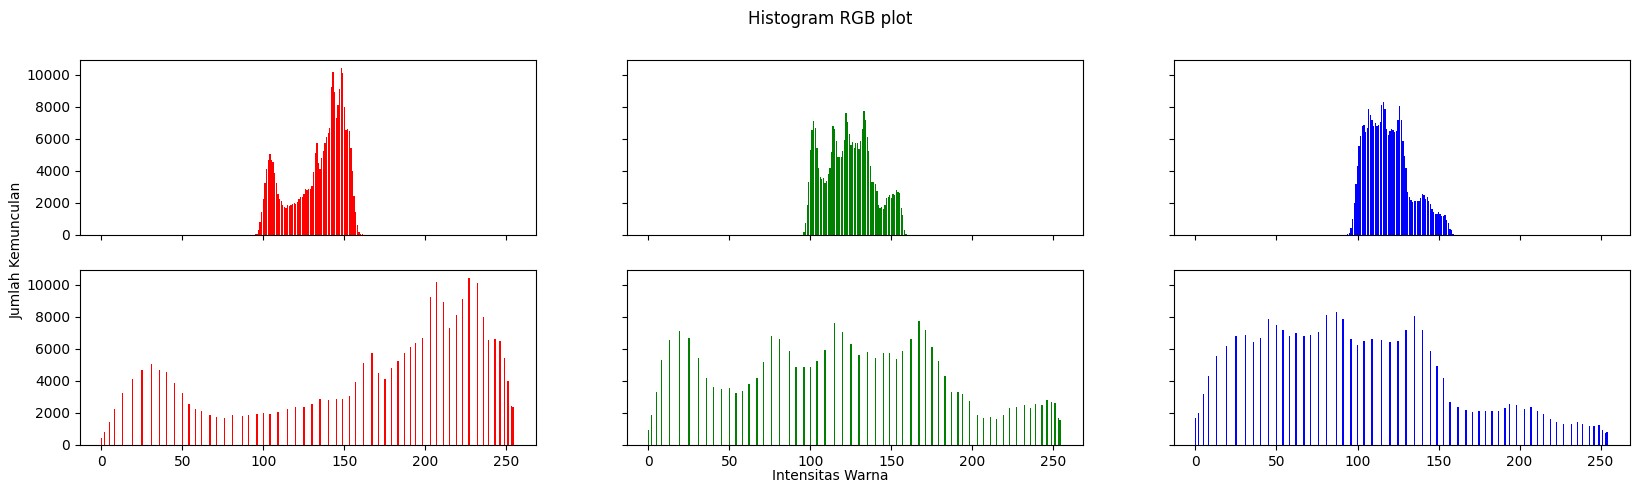

In [29]:
#histogram equalization manual
img = cv.imread('/content/sample_data/Lenna_lc.jpg')
def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(img)

#convert to Numpy array
img_array = np.asarray(img)

#STEP 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#STEP 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')


6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?
>
> Hasil dari kedua pendekatan seharusnya mirip, dengan perbedaan kecil dalam representasi bilangan bulat yang bisa muncul sebagai perbedaan dalam intensitas piksel yang sangat kecil.

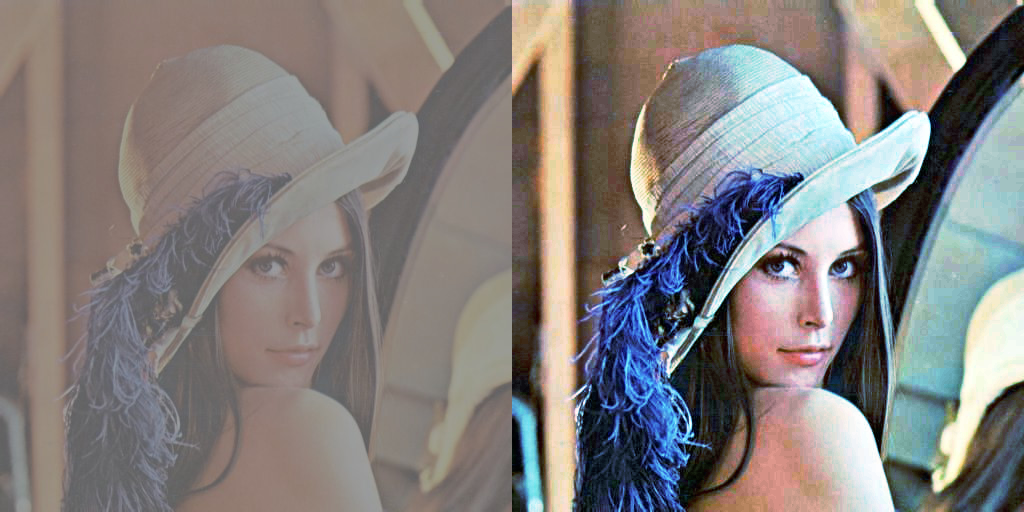

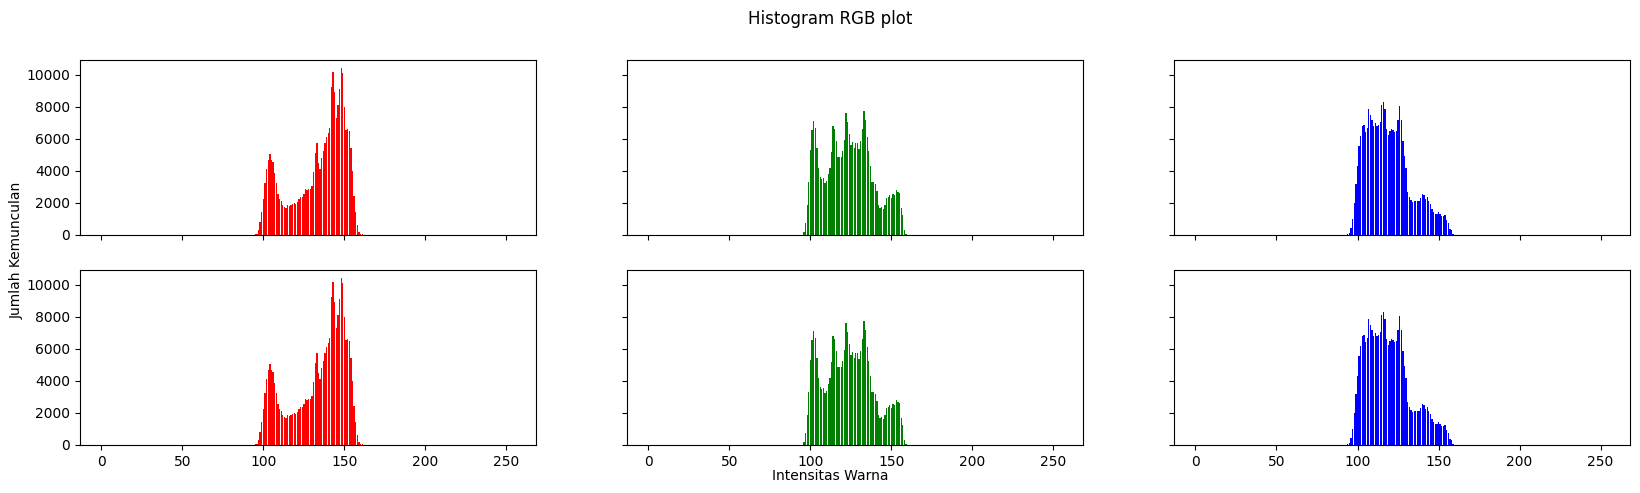

In [30]:
# Histogram equalization using library
img = cv.imread('/content/sample_data/Lenna_lc.jpg')
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

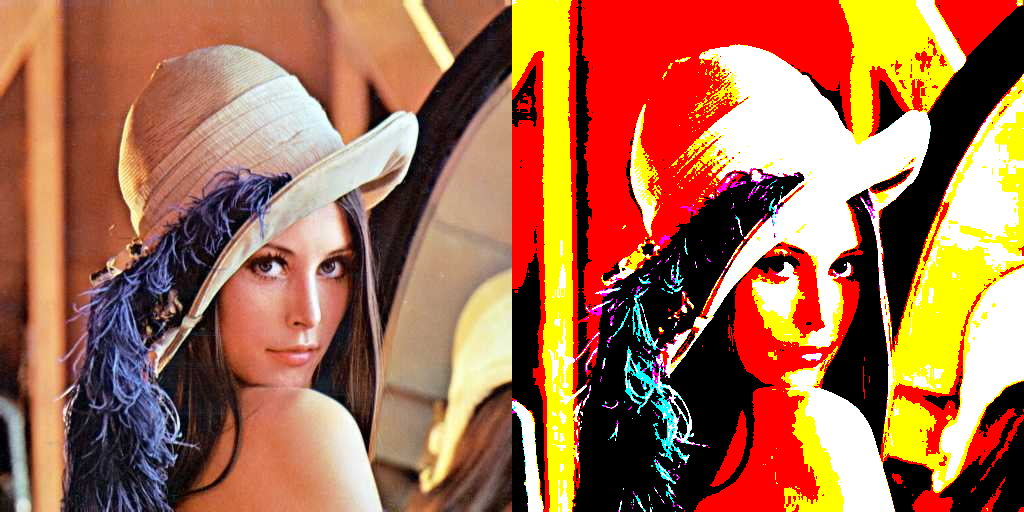

In [31]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Baca gambar lena.jpg
img = cv2.imread('/content/sample_data/Lenna.jpg')

# Ubah gambar menjadi array NumPy
img_array = np.array(img)

# Daftar warna yang diinginkan
colors = {
    "Hitam": [0, 0, 0],
    "Hijau": [0, 255, 0],
    "Kuning": [255, 255, 0],
    "Biru": [0, 0, 255],
    "Cyan": [0, 255, 255],
    "Magenta": [255, 0, 255],
    "Putih": [255, 255, 255]
}

# Fungsi untuk mencari warna terdekat dalam daftar warna yang diinginkan
def closest_color(color):
    min_dist = float('inf')
    closest = None
    for name, target_color in colors.items():
        dist = np.linalg.norm(np.array(color) - np.array(target_color))
        if dist < min_dist:
            min_dist = dist
            closest = name
    return closest

# Membuat gambar hasil dengan pemetaan warna
mapped_img = np.zeros_like(img_array)

for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
        pixel_color = img_array[i, j]
        nearest_color = closest_color(pixel_color)
        mapped_img[i, j] = colors[nearest_color]

# Gabungkan gambar asli dan hasil menjadi satu gambar besar
combined_img = np.hstack((img, mapped_img))

# Menampilkan gambar besar yang telah digabungkan
cv2_imshow(combined_img)


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

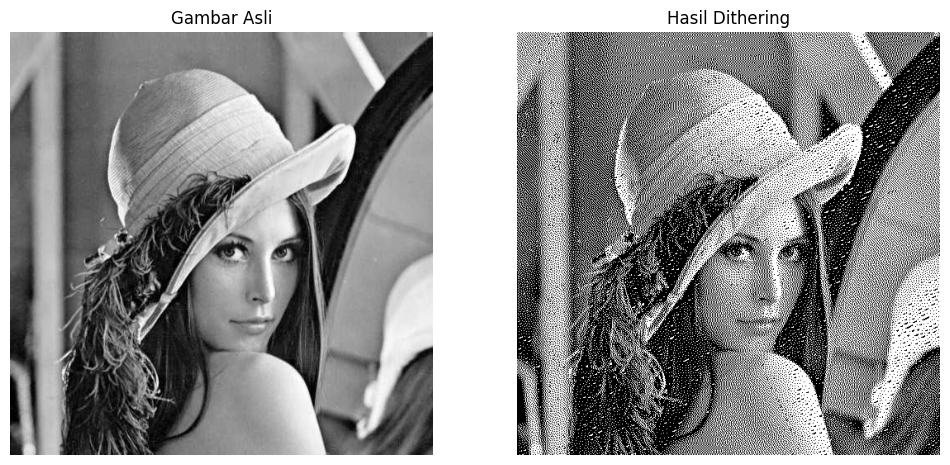

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar lena.jpg
img = cv2.imread('/content/sample_data/Lenna.jpg', cv2.IMREAD_GRAYSCALE)  # Konversi ke grayscale

# Dapatkan tinggi dan lebar gambar
height, width = img.shape

# Salin gambar asli untuk hasil dithering
dithered_img = img.copy()

for y in range(height):
    for x in range(width):
        old_pixel = dithered_img[y, x]
        new_pixel = 0 if old_pixel < 128 else 255
        dithered_img[y, x] = new_pixel

        error = old_pixel - new_pixel

        if x + 1 < width:
            dithered_img[y, x + 1] += error * 7 / 16
        if y + 1 < height:
            if x - 1 >= 0:
                dithered_img[y + 1, x - 1] += error * 3 / 16
            dithered_img[y + 1, x] += error * 5 / 16
            if x + 1 < width:
                dithered_img[y + 1, x + 1] += error * 1 / 16

# Tampilkan gambar asli dan hasil dithering
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Gambar Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Hasil Dithering')
plt.imshow(cv2.cvtColor(dithered_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!


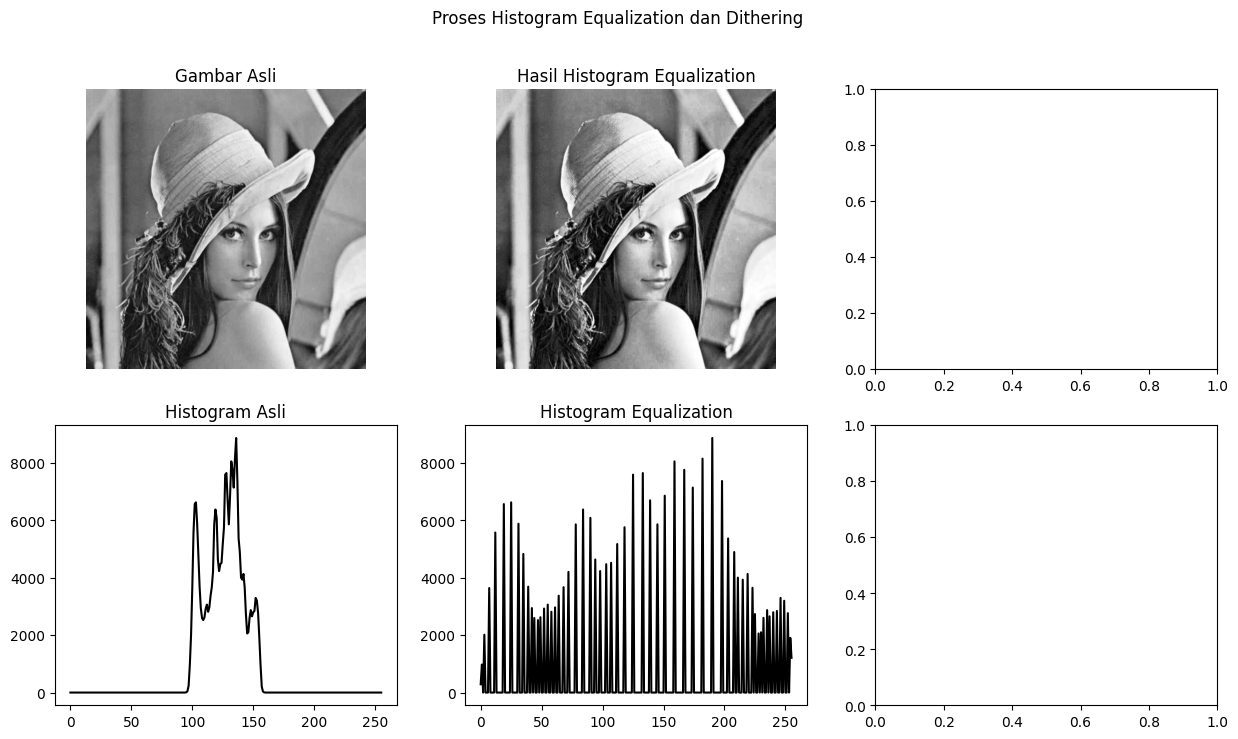

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar lena_lc.jpg dan konversi ke grayscale
img = cv2.imread('/content/sample_data/Lenna_lc.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_img = cv2.equalizeHist(img)

# Dapatkan tinggi dan lebar gambar
height, width = img.shape





# Plot histogram citra grayscale
histogram_original = cv2.calcHist([img], [0], None, [256], [0, 256])
histogram_equalized = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Tampilkan gambar dan histogram
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Proses Histogram Equalization dan Dithering')

# Tampilkan gambar asli
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Gambar Asli')
axs[0, 0].axis('off')

# Tampilkan histogram gambar asli
axs[1, 0].plot(histogram_original, color='black')
axs[1, 0].set_title('Histogram Asli')

# Tampilkan hasil histogram equalization
axs[0, 1].imshow(equalized_img, cmap='gray')
axs[0, 1].set_title('Hasil Histogram Equalization')
axs[0, 1].axis('off')

# Tampilkan histogram hasil histogram equalization
axs[1, 1].plot(histogram_equalized, color='black')
axs[1, 1].set_title('Histogram Equalization')


plt.show()
